In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUDIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data=pd.read_csv('spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
data.shape

(5171, 4)

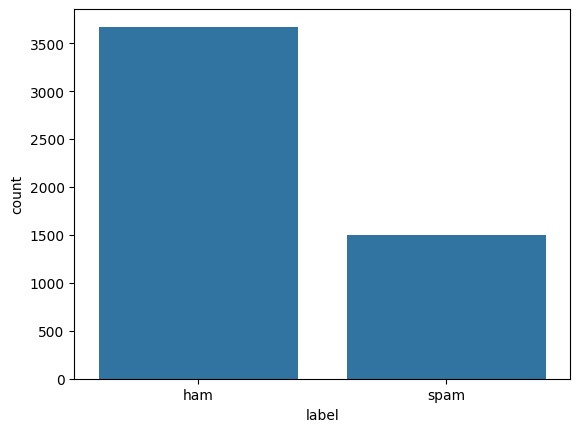

In [8]:
sns.countplot(x='label',data=data)
plt.show()

<Axes: xlabel='label', ylabel='count'>

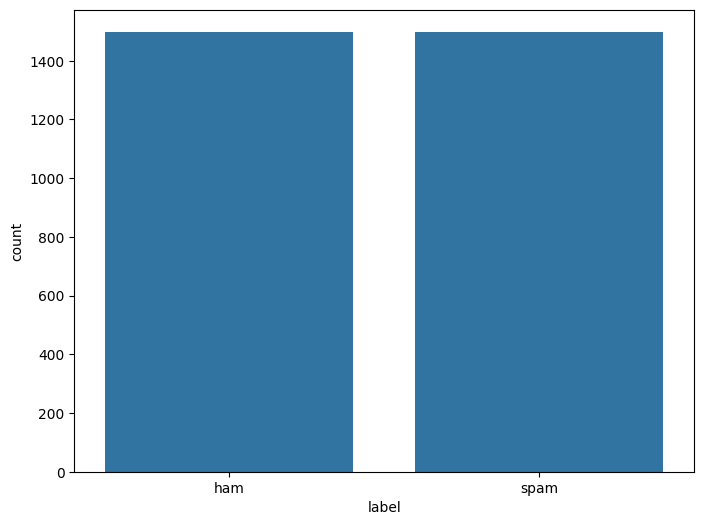

In [15]:
ham_msg = data[data.label_num==0]
spam_msg = data[data.label_num==1]
ham_msg = ham_msg.sample(len(spam_msg),random_state=42)

balanced_data = pd.concat([ham_msg,spam_msg]).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='label',data=balanced_data)

In [16]:
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...,0
1,2982,ham,Subject: feb 01 prod : sale to teco gas proces...,0
2,2711,ham,Subject: california energy crisis\r\ncaliforni...,0
3,3116,ham,Subject: re : nom / actual volume for april 23...,0
4,1314,ham,Subject: eastrans nomination changes effective...,0


In [18]:
balanced_data['text']=balanced_data['text'].str.replace('Subject','')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


In [19]:
punctuations = string.punctuation
def remove_punctuation(text):
    tmp = str.maketrans('','',punctuations)
    return text.translate(tmp)

balanced_data['text']=balanced_data['text'].apply(lambda x: remove_punctuation(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [20]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
    for word in str(text).split():
        word=word.lower()
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)
    return output

balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


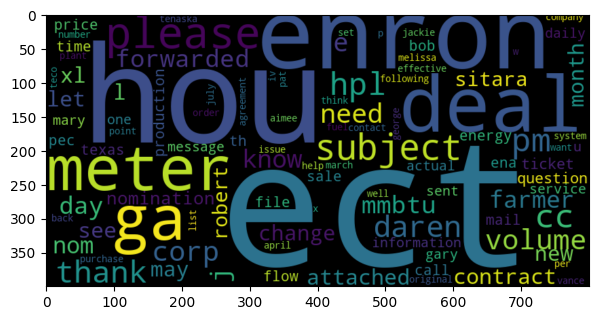

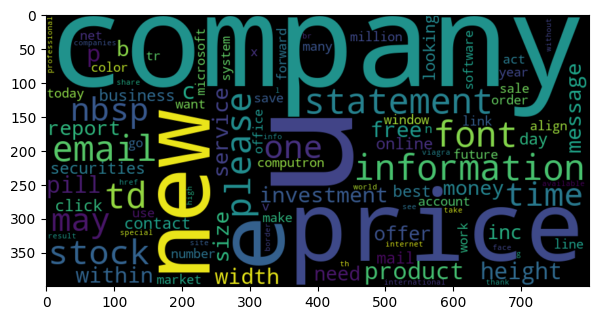

In [21]:
def plot_word_cloud(data):
    email = " ".join(data['text'])
    plt.figure(figsize=(7,7))
    wc = WordCloud(background_color='black', max_words=100,width=800,height=400,collocations=False).generate(email)
    plt.imshow(wc,interpolation='bilinear')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label_num']==0])
plot_word_cloud(balanced_data[balanced_data['label_num']==1])

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
train_X,test_X,train_Y,test_Y = train_test_split(balanced_data['text'],balanced_data['label_num'],test_size=0.2,random_state=42)

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100

train_sequences = pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')
test_sequences = pad_sequences(test_sequences,maxlen=max_len,padding='post',truncating='post')



In [38]:
train_Y = train_Y.astype(int)
test_Y = test_Y.astype(int)


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=32,input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           1274912   
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1278625 (4.88 MB)
Trainable params: 1278625 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [40]:
es = EarlyStopping(patience = 3,monitor = 'val_accuracy',restore_best_weights= True)
lr = ReduceLROnPlateau(patience = 2,monitor = 'val_loss',factor = 0.5,verbose = 0)

In [42]:
history = model.fit(train_sequences,train_Y,validation_data=(test_sequences,test_Y),epochs=20,batch_size=32,callbacks = [lr,es])

Epoch 1/20
75/75 [==============================] - 5s 63ms/step - loss: 0.0683 - accuracy: 0.9871 - val_loss: 0.1213 - val_accuracy: 0.9733 - lr: 5.0000e-04
Epoch 2/20
75/75 [==============================] - 5s 64ms/step - loss: 0.0510 - accuracy: 0.9904 - val_loss: 0.1250 - val_accuracy: 0.9733 - lr: 5.0000e-04
Epoch 3/20
75/75 [==============================] - 5s 65ms/step - loss: 0.0704 - accuracy: 0.9867 - val_loss: 0.2252 - val_accuracy: 0.9517 - lr: 5.0000e-04
Epoch 4/20
75/75 [==============================] - 5s 64ms/step - loss: 0.0890 - accuracy: 0.9821 - val_loss: 0.1646 - val_accuracy: 0.9633 - lr: 2.5000e-04


In [43]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

19/19 [==============================] - 0s 16ms/step - loss: 0.1213 - accuracy: 0.9733
Test Loss : 0.12125096470117569
Test Accuracy : 0.9733333587646484


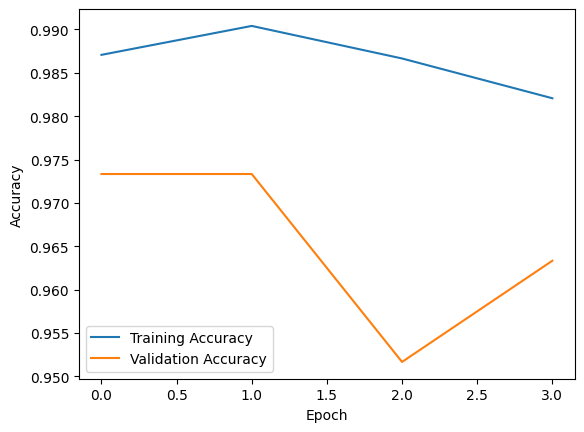

In [44]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import precision_score, f1_score
predictions = model.predict(test_sequences)
predicted_labels = np.round(predictions)
precision = precision_score(test_Y, predicted_labels)
f1 = f1_score(test_Y, predicted_labels)

print("Precision: {:.4f}".format(precision))
print("F1 Score: {:.4f}".format(f1))

19/19 [==============================] - 1s 18ms/step
Precision: 0.9622
F1 Score: 0.9722
